In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.keys()

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [4]:
df_train.shape

(1364, 36)

In [5]:
df_train.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_LF                  int64
Item_Fat_Content_Low Fat             int64
Item_Fat_Content_Regular             int64
Item_Fat_Content_low fat             int64
Item_Fat_Content_reg                 int64
Item_Type_Baking Goods               int64
Item_Type_Breads                     int64
Item_Type_Breakfast                  int64
Item_Type_Canned                     int64
Item_Type_Dairy                      int64
Item_Type_Frozen Foods               int64
Item_Type_Fruits and Vegetables      int64
Item_Type_Hard Drinks                int64
Item_Type_Health and Hygiene         int64
Item_Type_Household                  int64
Item_Type_Meat                       int64
Item_Type_Others                     int64
Item_Type_Seafood                    int64
Item_Type_S

In [6]:
df_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,6.800000,0.037490,48.6034,2004,291.6204,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,15.600000,0.172597,114.8518,1997,2163.1842,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,12.911575,0.054721,107.8254,1985,2387.5588,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11.800000,0.098312,81.4618,1998,161.1236,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,17.850000,0.046600,125.1388,2004,1981.4208,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      1364 non-null   float64
 1   Item_Visibility                  1364 non-null   float64
 2   Item_MRP                         1364 non-null   float64
 3   Outlet_Establishment_Year        1364 non-null   int64  
 4   Item_Outlet_Sales                1364 non-null   float64
 5   Item_Fat_Content_LF              1364 non-null   int64  
 6   Item_Fat_Content_Low Fat         1364 non-null   int64  
 7   Item_Fat_Content_Regular         1364 non-null   int64  
 8   Item_Fat_Content_low fat         1364 non-null   int64  
 9   Item_Fat_Content_reg             1364 non-null   int64  
 10  Item_Type_Baking Goods           1364 non-null   int64  
 11  Item_Type_Breads                 1364 non-null   int64  
 12  Item_Type_Breakfast 

In [8]:
df_train.tail()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1359,7.970000,0.021579,105.9596,2002,2049.3324,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1360,13.800000,0.097611,54.8930,2007,679.1160,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1361,12.911575,0.010468,162.9526,1985,822.2630,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
1362,18.000000,0.015482,159.3604,2002,2059.9852,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1363,15.000000,0.162093,182.5266,2009,1290.9862,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [9]:
# check the test dataset

df_test = pd.read_csv('test.csv')

In [10]:
df_test.keys()

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [11]:
df_test.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_LF                  int64
Item_Fat_Content_Low Fat             int64
Item_Fat_Content_Regular             int64
Item_Fat_Content_low fat             int64
Item_Fat_Content_reg                 int64
Item_Type_Baking Goods               int64
Item_Type_Breads                     int64
Item_Type_Breakfast                  int64
Item_Type_Canned                     int64
Item_Type_Dairy                      int64
Item_Type_Frozen Foods               int64
Item_Type_Fruits and Vegetables      int64
Item_Type_Hard Drinks                int64
Item_Type_Health and Hygiene         int64
Item_Type_Household                  int64
Item_Type_Meat                       int64
Item_Type_Others                     int64
Item_Type_Seafood                    int64
Item_Type_S

In [12]:
df_test.shape

(341, 36)

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      341 non-null    float64
 1   Item_Visibility                  341 non-null    float64
 2   Item_MRP                         341 non-null    float64
 3   Outlet_Establishment_Year        341 non-null    int64  
 4   Item_Outlet_Sales                341 non-null    float64
 5   Item_Fat_Content_LF              341 non-null    int64  
 6   Item_Fat_Content_Low Fat         341 non-null    int64  
 7   Item_Fat_Content_Regular         341 non-null    int64  
 8   Item_Fat_Content_low fat         341 non-null    int64  
 9   Item_Fat_Content_reg             341 non-null    int64  
 10  Item_Type_Baking Goods           341 non-null    int64  
 11  Item_Type_Breads                 341 non-null    int64  
 12  Item_Type_Breakfast   

In [14]:
df_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,18.100,0.022526,95.0094,2007,1713.7692,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,6.615,0.093575,199.4426,2002,3361.6242,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,11.850,0.050187,164.1526,2002,3124.5994,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,13.500,0.159969,147.6102,1999,1603.9122,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
4,14.000,0.029769,145.4786,1999,1300.3074,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [15]:
df_test.tail()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
336,12.911575,0.150123,154.5314,1985,1396.1826,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
337,12.150000,0.015524,212.0928,2009,2735.1064,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
338,12.911575,0.024032,124.9730,1985,2463.4600,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
339,10.195000,0.126383,112.1886,1997,667.1316,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
340,14.700000,0.072593,48.5034,2009,874.8612,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [16]:
df_test.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [17]:
df_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [18]:
df = pd.merge(left=df_train, right=df_test, how='outer')

In [19]:
df.shape

(1705, 36)

In [20]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,6.800000,0.037490,48.6034,2004,291.6204,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,15.600000,0.172597,114.8518,1997,2163.1842,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,12.911575,0.054721,107.8254,1985,2387.5588,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11.800000,0.098312,81.4618,1998,161.1236,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,17.850000,0.046600,125.1388,2004,1981.4208,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [21]:
df.tail()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1700,12.911575,0.150123,154.5314,1985,1396.1826,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1701,12.150000,0.015524,212.0928,2009,2735.1064,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1702,12.911575,0.024032,124.9730,1985,2463.4600,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1703,10.195000,0.126383,112.1886,1997,667.1316,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1704,14.700000,0.072593,48.5034,2009,874.8612,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [22]:
df.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_LF                  int64
Item_Fat_Content_Low Fat             int64
Item_Fat_Content_Regular             int64
Item_Fat_Content_low fat             int64
Item_Fat_Content_reg                 int64
Item_Type_Baking Goods               int64
Item_Type_Breads                     int64
Item_Type_Breakfast                  int64
Item_Type_Canned                     int64
Item_Type_Dairy                      int64
Item_Type_Frozen Foods               int64
Item_Type_Fruits and Vegetables      int64
Item_Type_Hard Drinks                int64
Item_Type_Health and Hygiene         int64
Item_Type_Household                  int64
Item_Type_Meat                       int64
Item_Type_Others                     int64
Item_Type_Seafood                    int64
Item_Type_S

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 1704
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      1705 non-null   float64
 1   Item_Visibility                  1705 non-null   float64
 2   Item_MRP                         1705 non-null   float64
 3   Outlet_Establishment_Year        1705 non-null   int64  
 4   Item_Outlet_Sales                1705 non-null   float64
 5   Item_Fat_Content_LF              1705 non-null   int64  
 6   Item_Fat_Content_Low Fat         1705 non-null   int64  
 7   Item_Fat_Content_Regular         1705 non-null   int64  
 8   Item_Fat_Content_low fat         1705 non-null   int64  
 9   Item_Fat_Content_reg             1705 non-null   int64  
 10  Item_Type_Baking Goods           1705 non-null   int64  
 11  Item_Type_Breads                 1705 non-null   int64  
 12  Item_Type_Breakfast 

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,1705.0,12.911575,4.211454,4.555,9.500000,12.911575,16.100000,21.250000
Item_Visibility,1705.0,0.065598,0.051951,0.000,0.026547,0.053398,0.092937,0.321115
Item_MRP,1705.0,142.698052,62.667925,31.490,95.009400,143.812800,186.658200,266.688400
Outlet_Establishment_Year,1705.0,1998.053372,8.240094,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,1705.0,2205.287752,1723.413422,33.290,874.861200,1796.328400,3062.014200,13086.964800
Item_Fat_Content_LF,1705.0,0.037537,0.190129,0.000,0.000000,0.000000,0.000000,1.000000
Item_Fat_Content_Low Fat,1705.0,0.594721,0.491090,0.000,0.000000,1.000000,1.000000,1.000000
Item_Fat_Content_Regular,1705.0,0.344282,0.475273,0.000,0.000000,0.000000,1.000000,1.000000
Item_Fat_Content_low fat,1705.0,0.012903,0.112890,0.000,0.000000,0.000000,0.000000,1.000000
Item_Fat_Content_reg,1705.0,0.010557,0.102234,0.000,0.000000,0.000000,0.000000,1.000000


In [25]:
# Let's replace the empty strings with NaN values

df = df.replace(' ', np.nan)

In [26]:
# Let's replace the question marks (?) with NaN values

df = df.replace('?', np.nan)

In [27]:
df.sample(n=2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
653,18.35,0.089163,191.3504,2002,3259.7568,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
479,17.70,0.011611,95.0410,2004,868.8690,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 1704
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      1705 non-null   float64
 1   Item_Visibility                  1705 non-null   float64
 2   Item_MRP                         1705 non-null   float64
 3   Outlet_Establishment_Year        1705 non-null   int64  
 4   Item_Outlet_Sales                1705 non-null   float64
 5   Item_Fat_Content_LF              1705 non-null   int64  
 6   Item_Fat_Content_Low Fat         1705 non-null   int64  
 7   Item_Fat_Content_Regular         1705 non-null   int64  
 8   Item_Fat_Content_low fat         1705 non-null   int64  
 9   Item_Fat_Content_reg             1705 non-null   int64  
 10  Item_Type_Baking Goods           1705 non-null   int64  
 11  Item_Type_Breads                 1705 non-null   int64  
 12  Item_Type_Breakfast 

In [29]:
# display categorical features/columns -> 

categorical_columns = df.select_dtypes(include=[np.object0]).columns

categorical_columns

Index([], dtype='object')

In [30]:
# display numerical features/columns -> 

numerical_columns = df.select_dtypes(include=[np.number]).columns

numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [31]:
df.count()

Item_Weight                        1705
Item_Visibility                    1705
Item_MRP                           1705
Outlet_Establishment_Year          1705
Item_Outlet_Sales                  1705
Item_Fat_Content_LF                1705
Item_Fat_Content_Low Fat           1705
Item_Fat_Content_Regular           1705
Item_Fat_Content_low fat           1705
Item_Fat_Content_reg               1705
Item_Type_Baking Goods             1705
Item_Type_Breads                   1705
Item_Type_Breakfast                1705
Item_Type_Canned                   1705
Item_Type_Dairy                    1705
Item_Type_Frozen Foods             1705
Item_Type_Fruits and Vegetables    1705
Item_Type_Hard Drinks              1705
Item_Type_Health and Hygiene       1705
Item_Type_Household                1705
Item_Type_Meat                     1705
Item_Type_Others                   1705
Item_Type_Seafood                  1705
Item_Type_Snack Foods              1705
Item_Type_Soft Drinks              1705


In [32]:
# check for duplicate rows in the dataset

df.duplicated().sum()

0

In [71]:
# check missing values

df.isnull().sum().sum()

0

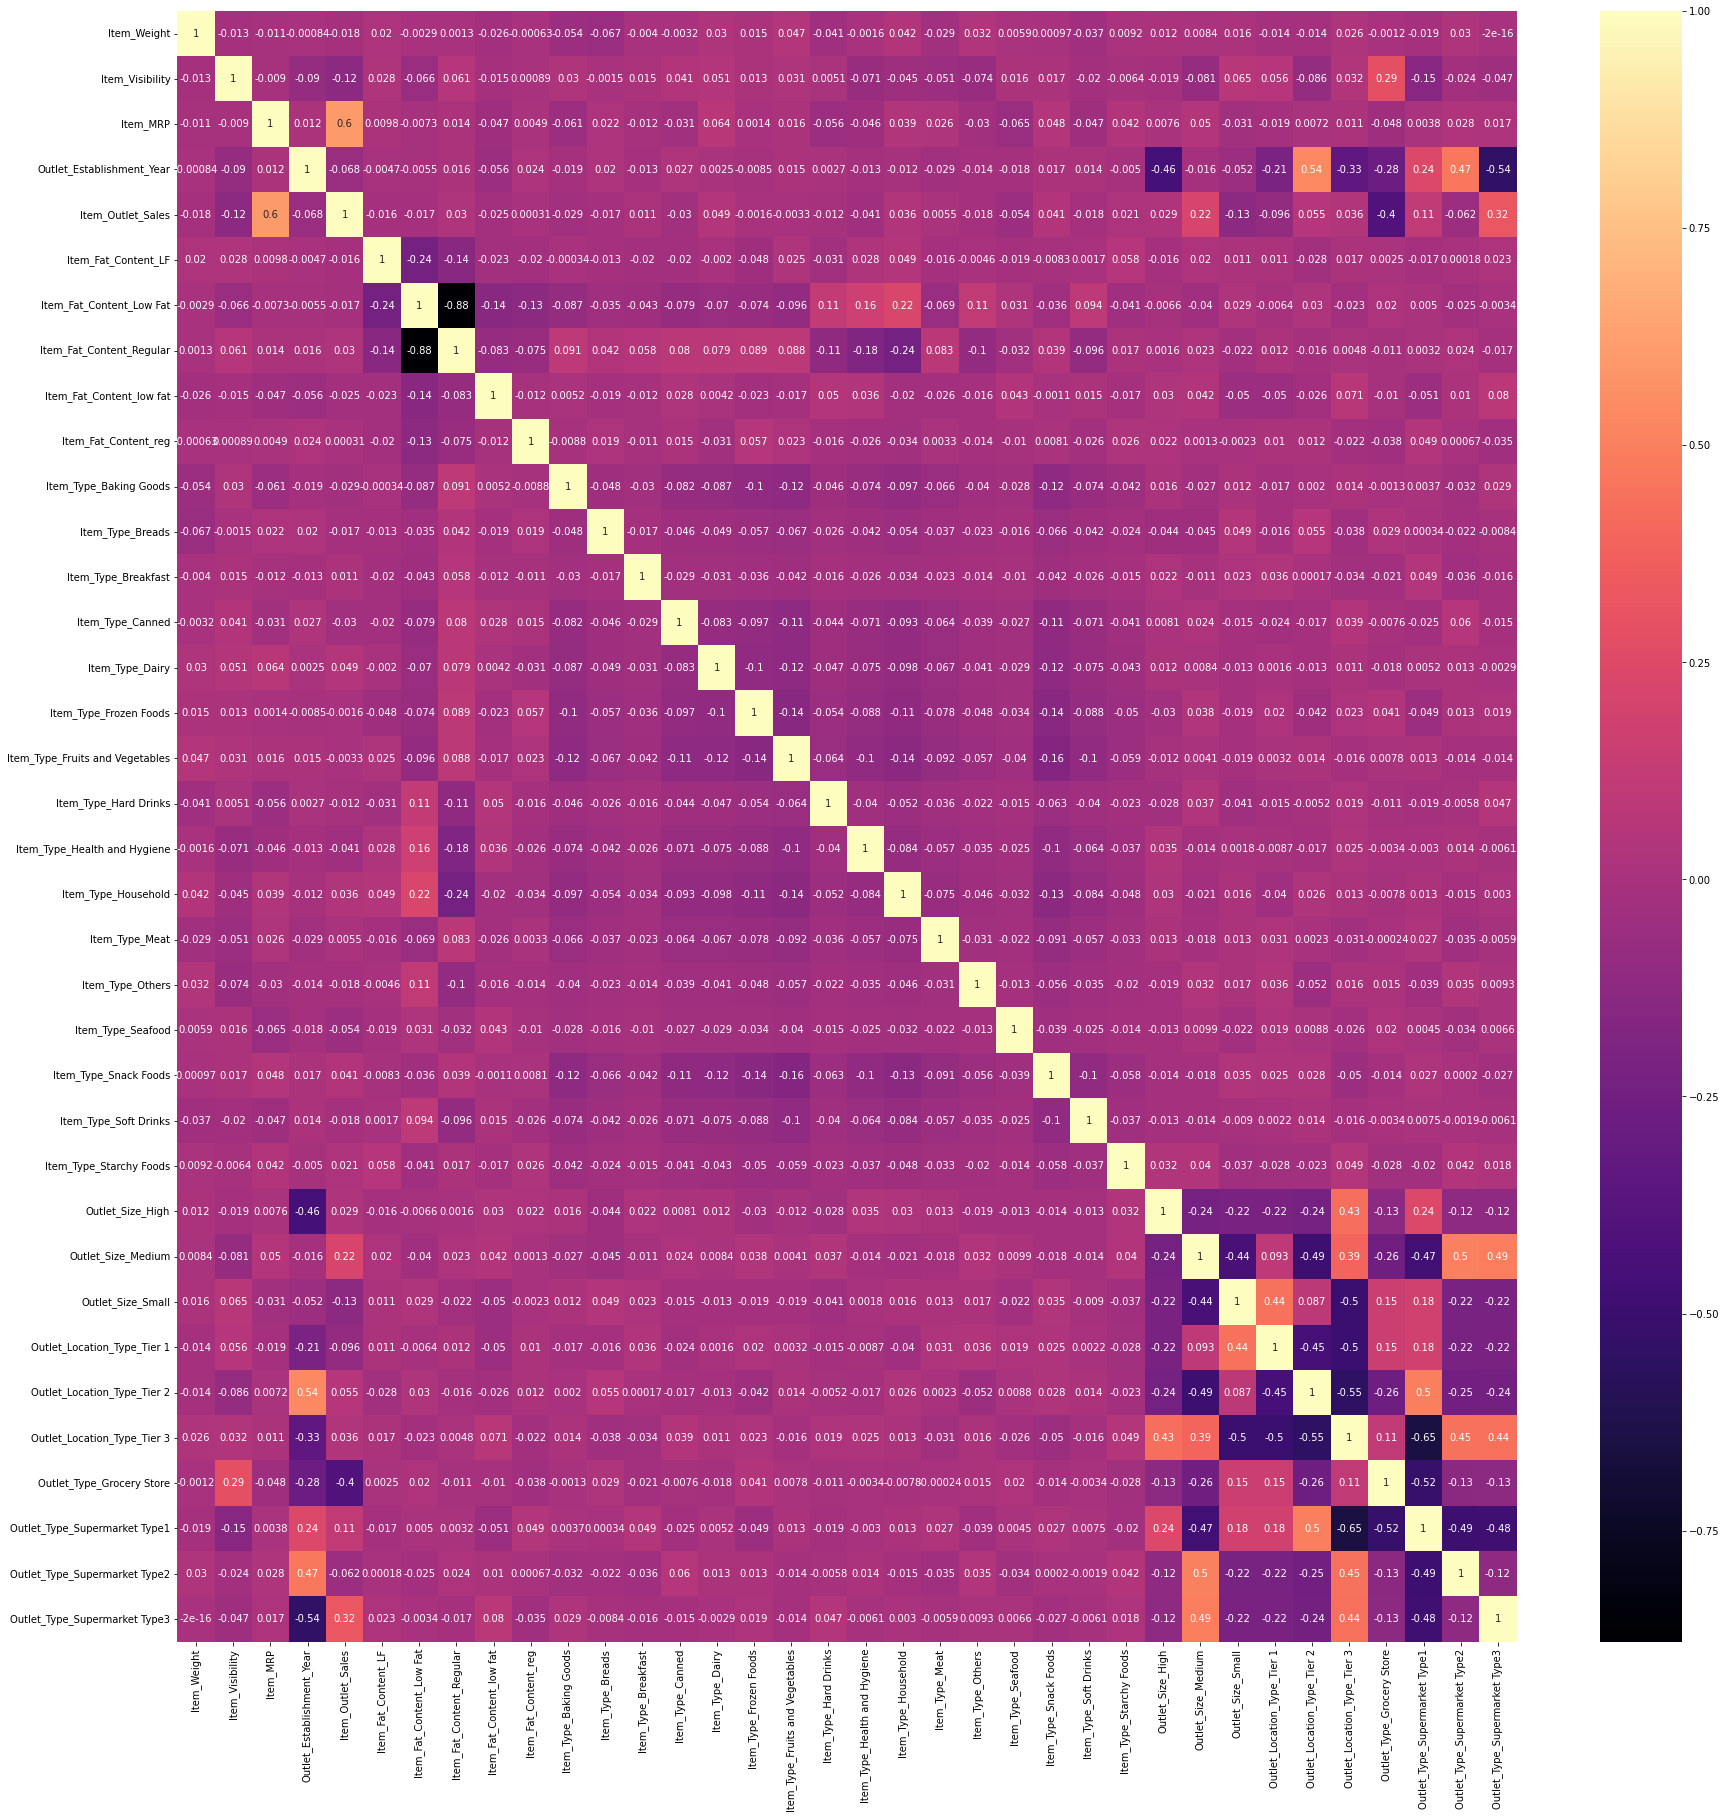

In [34]:
# Checking correlation
plt.rcParams['figure.figsize'] = (30,30)
e = df.corr()
top_correlated_features = e.index
g = sns.heatmap(df[top_correlated_features].corr(), annot=True, cmap='magma')

<AxesSubplot:>

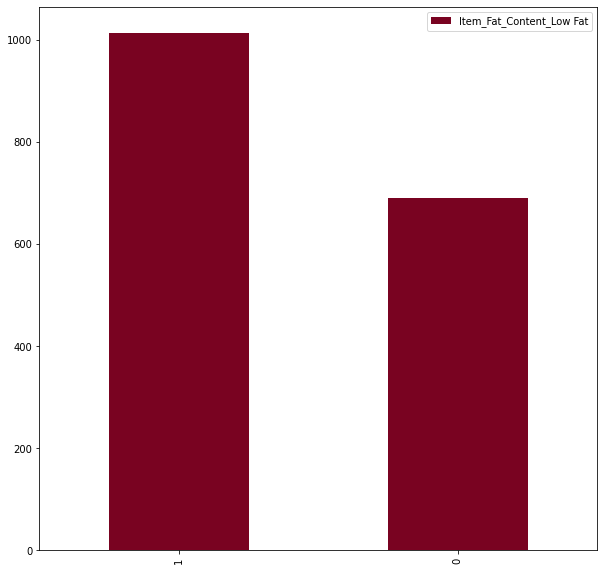

In [35]:
plt.rcParams['figure.figsize'] = (6,6)
pd.DataFrame(df['Item_Fat_Content_Low Fat'].value_counts()).plot(kind='bar', color = ('#790321', '#000874'),figsize=(10,10))

        Observation: 1 has more Item_Fat_Content_Low Fat than 0

<AxesSubplot:>

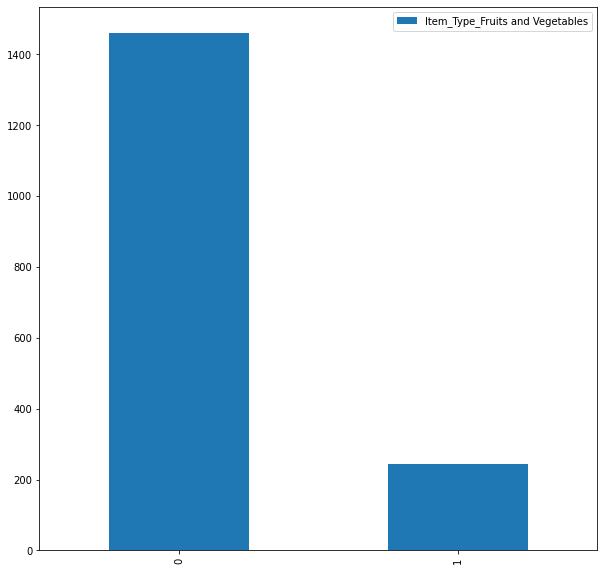

In [36]:
pd.DataFrame(df['Item_Type_Fruits and Vegetables'].value_counts()).plot(kind='bar', figsize=(10,10))

        Observation: 0 has more Item_Type_Fruits and Vegetables than 1

<AxesSubplot:>

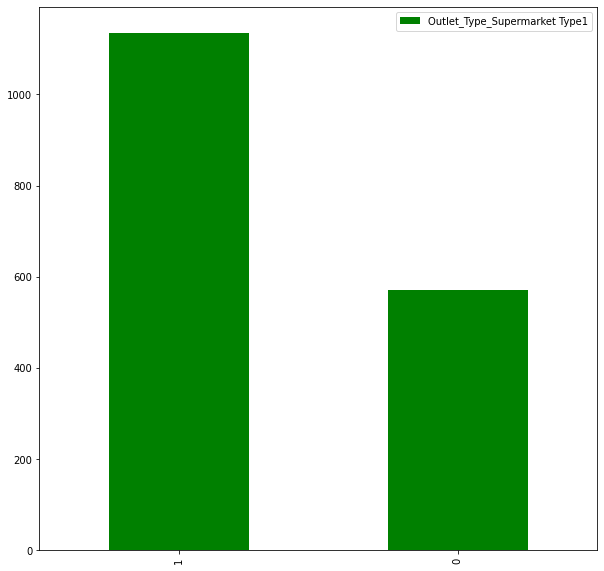

In [37]:
pd.DataFrame(df['Outlet_Type_Supermarket Type1'].value_counts()).plot(kind='bar', color=('green'),figsize=(10,10))

    Observation: 1 has more Outlet_Type_Supermarket Type1 than 0

        - we can continue performing  EDA

In [38]:
# prepare data for machine learning

df.sample(n=2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
648,10.800000,0.049820,243.2144,2002,1225.0720,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
837,12.911575,0.079931,219.7456,1985,884.1824,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [39]:
df.drop(
    columns=['Outlet_Establishment_Year','Item_Weight'], inplace=True
)

In [40]:
df.drop(
    columns=['Item_Fat_Content_Low Fat'], inplace=True
)

In [41]:
df.sample(n=2)

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
45,0.039114,116.0176,1488.7288,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
520,0.108206,58.3904,468.7232,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [42]:
df_test = df[df['Item_Outlet_Sales'].isna()]

In [43]:
df_train = df[~df['Item_Outlet_Sales'].isna()]

In [44]:
X = df_train.drop('Item_Outlet_Sales', axis=1)

In [45]:
X.head()

,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.037490,48.6034,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,0.172597,114.8518,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,0.054721,107.8254,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0.098312,81.4618,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0.046600,125.1388,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [46]:
X.shape

(1705, 32)

In [47]:
y = df['Item_Outlet_Sales']

In [48]:
y.shape

(1705,)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3
)

In [50]:
# calculate baseline

from sklearn.dummy import DummyRegressor

baseline = DummyRegressor()
baseline.fit(X_train, y_train)
y_baseline = baseline.predict(X_test)
y_baseline

array([2221.16070226, 2221.16070226, 2221.16070226, 2221.16070226,
       2221.16070226, 2221.16070226, 2221.16070226, 2221.16070226,
       2221.16070226, 2221.16070226, 2221.16070226, 2221.16070226,
       2221.16070226, 2221.16070226, 2221.16070226, 2221.16070226,
       2221.16070226, 2221.16070226, 2221.16070226, 2221.16070226,
       2221.16070226, 2221.16070226, 2221.16070226, 2221.16070226,
       2221.16070226, 2221.16070226, 2221.16070226, 2221.16070226,
       2221.16070226, 2221.16070226, 2221.16070226, 2221.16070226,
       2221.16070226, 2221.16070226, 2221.16070226, 2221.16070226,
       2221.16070226, 2221.16070226, 2221.16070226, 2221.16070226,
       2221.16070226, 2221.16070226, 2221.16070226, 2221.16070226,
       2221.16070226, 2221.16070226, 2221.16070226, 2221.16070226,
       2221.16070226, 2221.16070226, 2221.16070226, 2221.16070226,
       2221.16070226, 2221.16070226, 2221.16070226, 2221.16070226,
       2221.16070226, 2221.16070226, 2221.16070226, 2221.16070

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [52]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [53]:
lin_reg.coef_

array([ -202.62059461,    15.90557965,  -173.87647968,    71.97010729,
        -465.6117059 ,  -416.64299015,    10.39630148,  -137.02866807,
          92.68482386,   -15.01783275,    90.03911133,    73.7388297 ,
          28.76524066,    16.70846733,   -69.38677457,   133.3328422 ,
         -30.5167713 ,    66.65039194,  -274.69072133,    70.0936175 ,
         224.77182953,  -280.54068751,   208.29798958,   525.61659783,
          59.10953167,  -112.35571243,   157.44071178,   -45.08499934,
       -1291.97493003,   307.48834435,  -505.51626339,  1490.00284907])

In [54]:
lin_reg.intercept_

-448.94589982334264

In [55]:
lin_reg.score

<bound method RegressorMixin.score of LinearRegression()>

In [56]:
y_pred = lin_reg.predict(X_test)

In [57]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.56 vs Baseline = -0.00
MAE Regressor = 871.06 vs Baseline = 1403.81
MSE Regressor = 1399069.10 vs Baseline = 3181678.04


        Our model is 56% accurate

In [58]:
df_feature_importance = pd.DataFrame(
    {
        'Features': X_train.columns,
        'Coeff': lin_reg.coef_,
        'ABS(Coeff)': abs(lin_reg.coef_),
        }
).set_index('Features').sort_values('Coeff', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
Outlet_Type_Supermarket Type3,1490.002849,1490.002849
Outlet_Size_Medium,525.616598,525.616598
Outlet_Type_Supermarket Type1,307.488344,307.488344
Item_Type_Soft Drinks,224.771830,224.771830
Outlet_Size_High,208.297990,208.297990
Outlet_Location_Type_Tier 2,157.440712,157.440712
Item_Type_Household,133.332842,133.332842
Item_Type_Breakfast,92.684824,92.684824
Item_Type_Dairy,90.039111,90.039111


In [76]:
# Scaling for more meaningful coefficients

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
lin_reg = LinearRegression()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

lin_reg.fit(X_train_scaler, y_train)
y_test_pred = lin_reg.predict(X_test_scaler)

In [77]:
# add polynomial features

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)

In [78]:
feature_translator = [
    (f'x{i}', feature) for i, feature in enumerate(X_train.columns, 0)
]
def translate_feature_names(s):
    for key, val in feature_translator:
        s = s.replace(key, val)
    return s

poly_features = [
    translate_feature_names(f) for f in poly.get_feature_names_out()
]

x_train_poly = pd.DataFrame(x_train_poly, columns=poly_features)
x_test_poly = pd.DataFrame(x_test_poly, columns=poly_features)

In [79]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train_poly, y_train)
y_pred = reg.predict(x_test_poly)

In [80]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = -36125981.88 vs Baseline = -0.00
MAE Regressor = 1984718.38 vs Baseline = 1403.81
MSE Regressor = 114840311028223.16 vs Baseline = 3181678.04


        Our Model Performs too poorly....throw it in the trash

In [81]:
# lasso

from sklearn.linear_model import Lasso

reg = Lasso(fit_intercept=False)

reg.fit(x_train_poly, y_train)

y_pred = reg.predict(x_test_poly)

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.467e+08, tolerance: 9.318e+05
  model = cd_fast.enet_coordinate_descent(


In [82]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.42 vs Baseline = -0.00
MAE Regressor = 953.94 vs Baseline = 1403.81
MSE Regressor = 1849565.57 vs Baseline = 3181678.04


        42% accurate

In [83]:
# Finding the optimum regularization parameter

from sklearn.linear_model import LassoCV

# Make a list of 50 values between 0.000001 & 1,000,000
alphas = np.logspace(-6, 6, 50)

# We will do 5-fold cross validation
reg = LassoCV(alphas=alphas, fit_intercept=False, cv=5)

reg.fit(x_train_poly, y_train)

y_train_pred = reg.predict(x_train_poly)

y_pred = reg.predict(x_test_poly)

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.414e+08, tolerance: 7.607e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.244e+08, tolerance: 7.607e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

In [84]:
print(f"LassoCV: Chosen alpha = {reg.alpha_}")

LassoCV: Chosen alpha = 1151.3953993264481


In [85]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.59 vs Baseline = -0.00
MAE Regressor = 778.63 vs Baseline = 1403.81
MSE Regressor = 1297429.30 vs Baseline = 3181678.04


        59%

                svr

In [87]:
from sklearn.svm import SVR

In [88]:
svr = SVR()

svr.fit(X_train, y_train)

SVR()

In [89]:
y_pred = svr.predict(X_test)

In [90]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.04 vs Baseline = -0.00
MAE Regressor = 1306.53 vs Baseline = 1403.81
MSE Regressor = 3063568.41 vs Baseline = 3181678.04


        performs poorly - 4%

                            LinearSVR

In [91]:
from sklearn.svm import LinearSVR

l_svr = LinearSVR()

l_svr.fit(X_train, y_train)

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [92]:
y_pred = l_svr.predict(X_test)

In [93]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.39 vs Baseline = -0.00
MAE Regressor = 1003.32 vs Baseline = 1403.81
MSE Regressor = 1947059.05 vs Baseline = 3181678.04


            we get 39%

                                DecisionTreeRegressor

In [94]:
from sklearn.tree import DecisionTreeRegressor

tree_d = DecisionTreeRegressor()

tree_d.fit(X_train, y_train)

DecisionTreeRegressor()

In [95]:
y_pred = tree_d.predict(X_test)

In [96]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.24 vs Baseline = -0.00
MAE Regressor = 1095.77 vs Baseline = 1403.81
MSE Regressor = 2410138.73 vs Baseline = 3181678.04


                24%

                        RandomForestRegressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

reg_ran = RandomForestRegressor()

reg_ran.fit(X_train, y_train)

RandomForestRegressor()

In [98]:
y_pred = reg_ran.predict(X_test)

In [99]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.56 vs Baseline = -0.00
MAE Regressor = 816.91 vs Baseline = 1403.81
MSE Regressor = 1385125.36 vs Baseline = 3181678.04


                    56%

                Bagging regressor

In [100]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

bag_reg = BaggingRegressor(
    RandomForestRegressor(),
    n_estimators=100, bootstrap=True, n_jobs=-1
)

In [101]:
bag_reg.fit(X_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=100,
                 n_jobs=-1)

In [102]:
y_pred = bag_reg.predict(X_test)

In [103]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.59 vs Baseline = -0.00
MAE Regressor = 796.22 vs Baseline = 1403.81
MSE Regressor = 1316054.04 vs Baseline = 3181678.04


            59%

In [104]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import LinearSVR

bag_reg = BaggingRegressor(
    LinearSVR(),
    n_estimators=100, bootstrap=True, n_jobs=-1
)

In [105]:
bag_reg.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearSVR(), n_estimators=100, n_jobs=-1)

In [106]:
y_pred = bag_reg.predict(X_test)

In [107]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.39 vs Baseline = -0.00
MAE Regressor = 1003.52 vs Baseline = 1403.81
MSE Regressor = 1946126.91 vs Baseline = 3181678.04


            39%

In [108]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bag_reg = BaggingRegressor(
    DecisionTreeRegressor(),
    n_estimators=100, bootstrap=True, n_jobs=-1
)

In [109]:
bag_reg.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 n_jobs=-1)

In [110]:
y_pred = bag_reg.predict(X_test)

In [111]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.57 vs Baseline = -0.00
MAE Regressor = 813.45 vs Baseline = 1403.81
MSE Regressor = 1362791.20 vs Baseline = 3181678.04


            57%

In [112]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor(
    DecisionTreeRegressor(),
    n_estimators=500, learning_rate=0.5
)

In [113]:
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.5,
                  n_estimators=500)

In [114]:
y_pred = ada_reg.predict(X_test)

In [115]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.50 vs Baseline = -0.00
MAE Regressor = 864.94 vs Baseline = 1403.81
MSE Regressor = 1591203.66 vs Baseline = 3181678.04


                                    50%

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

grad_reg = GradientBoostingRegressor(
    n_estimators=500, learning_rate=0.5
)

In [118]:
grad_reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, n_estimators=500)

In [119]:
y_pred = grad_reg.predict(X_test)

In [120]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred),
        r2_score(y_test, y_baseline)
        )
)

print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_baseline)
        )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_baseline)
        )
)

R2 Regressor = 0.45 vs Baseline = -0.00
MAE Regressor = 968.29 vs Baseline = 1403.81
MSE Regressor = 1753521.97 vs Baseline = 3181678.04


            45%

                        Hyperparameter Tuning